In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/Subscription Cohort Analysis Data.csv")

In [ ]:
data.head()

,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid
0,154536156,2022-09-01,NaN,39,month,Yes
1,149713408,2022-09-01,2022-09-02,39,month,No
2,153756284,2022-09-01,2022-09-02,39,month,No
3,121253113,2022-09-01,2022-09-23,39,month,Yes
4,154467210,2022-09-01,2023-06-29,39,month,Yes


In [ ]:
data.tail()


,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid
3064,221145374,2023-09-07,NaN,39,month,Yes
3065,221130434,2023-09-07,NaN,39,month,Yes
3066,221189604,2023-09-08,NaN,39,month,Yes
3067,215174643,2023-09-08,NaN,39,month,Yes
3068,188354637,2023-09-08,NaN,39,month,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_id            3069 non-null   int64 
 1   created_date           3069 non-null   object
 2   canceled_date          2004 non-null   object
 3   subscription_cost      3069 non-null   int64 
 4   subscription_interval  3069 non-null   object
 5   was_subscription_paid  3069 non-null   object
dtypes: int64(2), object(4)
memory usage: 144.0+ KB


In [ ]:
data.nunique()

customer_id              2877
created_date              370
canceled_date             360
subscription_cost           1
subscription_interval       1
was_subscription_paid       2
dtype: int64

In [ ]:
data.isnull().sum()

customer_id                 0
created_date                0
canceled_date            1065
subscription_cost           0
subscription_interval       0
was_subscription_paid       0
dtype: int64

In [ ]:
(data.isnull().sum()/(len(data)))*100

customer_id               0.000000
created_date              0.000000
canceled_date            34.701857
subscription_cost         0.000000
subscription_interval     0.000000
was_subscription_paid     0.000000
dtype: float64

In [ ]:
data.dropna(subset=['canceled_date'], inplace=True)


In [ ]:
data.isnull().sum()

customer_id              0
created_date             0
canceled_date            0
subscription_cost        0
subscription_interval    0
was_subscription_paid    0
dtype: int64

In [ ]:
#What percentage of customers have subscribed for 5 months or more?
data['canceled_date'] = pd.to_datetime(data['canceled_date'])


In [ ]:
print(data['canceled_date'].dtype)


datetime64[ns]


In [ ]:
data['year'] = data['canceled_date'].dt.year
data = data[data['year'] != 2022]
data.drop(columns=['year'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1658 entries, 4 to 3022
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            1658 non-null   int64         
 1   created_date           1658 non-null   object        
 2   canceled_date          1658 non-null   datetime64[ns]
 3   subscription_cost      1658 non-null   int64         
 4   subscription_interval  1658 non-null   object        
 5   was_subscription_paid  1658 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 90.7+ KB


In [ ]:
data.head(1658)

,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid
4,154467210,2022-09-01,2023-06-29,39,month,Yes
5,154510811,2022-09-01,2023-05-08,39,month,Yes
21,135185873,2022-09-03,2023-05-10,39,month,Yes
22,154592664,2022-09-03,2023-04-01,39,month,Yes
23,119436804,2022-09-03,2023-04-10,39,month,Yes
...,...,...,...,...,...,...
2969,220576148,2023-08-26,2023-09-05,39,month,Yes
2978,128199550,2023-08-28,2023-08-31,39,month,Yes
2995,215202566,2023-08-30,2023-08-30,39,month,Yes
3021,134054676,2023-09-03,2023-09-05,39,month,Yes


In [ ]:
data['created_date'] = pd.to_datetime(data['created_date'])
data['date_gap'] = data['canceled_date'] - data['created_date']



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1658 entries, 4 to 3022
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   customer_id            1658 non-null   int64          
 1   created_date           1658 non-null   datetime64[ns] 
 2   canceled_date          1658 non-null   datetime64[ns] 
 3   subscription_cost      1658 non-null   int64          
 4   subscription_interval  1658 non-null   object         
 5   was_subscription_paid  1658 non-null   object         
 6   date_gap               1658 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), int64(2), object(2), timedelta64[ns](1)
memory usage: 168.2+ KB


In [ ]:
data.head(1658)

,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid,date_gap
4,154467210,2022-09-01,2023-06-29,39,month,Yes,301 days
5,154510811,2022-09-01,2023-05-08,39,month,Yes,249 days
21,135185873,2022-09-03,2023-05-10,39,month,Yes,249 days
22,154592664,2022-09-03,2023-04-01,39,month,Yes,210 days
23,119436804,2022-09-03,2023-04-10,39,month,Yes,219 days
...,...,...,...,...,...,...,...
2969,220576148,2023-08-26,2023-09-05,39,month,Yes,10 days
2978,128199550,2023-08-28,2023-08-31,39,month,Yes,3 days
2995,215202566,2023-08-30,2023-08-30,39,month,Yes,0 days
3021,134054676,2023-09-03,2023-09-05,39,month,Yes,2 days


In [ ]:
data_filtered = data[data['date_gap'] >= pd.Timedelta(days=5*30)]
data_filtered.drop(columns=['date_gap'], inplace=True)



In [ ]:
data_filtered.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 4 to 1666
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            161 non-null    int64         
 1   created_date           161 non-null    datetime64[ns]
 2   canceled_date          161 non-null    datetime64[ns]
 3   subscription_cost      161 non-null    int64         
 4   subscription_interval  161 non-null    object        
 5   was_subscription_paid  161 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 8.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1658 entries, 4 to 3022
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   customer_id            1658 non-null   int64          
 1   created_date           1658 non-null   datetime64[ns] 
 2   canceled_date

In [ ]:
#print(data_filtered.to_string())
data_filtered.head(161)

,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid
4,154467210,2022-09-01,2023-06-29,39,month,Yes
5,154510811,2022-09-01,2023-05-08,39,month,Yes
21,135185873,2022-09-03,2023-05-10,39,month,Yes
22,154592664,2022-09-03,2023-04-01,39,month,Yes
23,119436804,2022-09-03,2023-04-10,39,month,Yes
...,...,...,...,...,...,...
1474,197873706,2023-03-12,2023-08-12,39,month,Yes
1499,143776119,2023-03-15,2023-08-28,39,month,Yes
1545,206995576,2023-03-21,2023-08-25,39,month,Yes
1560,204598188,2023-03-23,2023-08-31,39,month,Yes


In [ ]:
total_entries_main = len(data)
entries_filtered = len(data_filtered)
percentage_filtered = (entries_filtered / total_entries_main) * 100
print(f"percentage of customers have subscribed for 5 months or more is: {percentage_filtered:.2f}%")


percentage of customers have subscribed for 5 months or more is: 9.71%


In [ ]:
#What month had the highest subscriber retention, and the lowest?

import calendar

data['created_date'] = pd.to_datetime(data['created_date'])
data['canceled_date'] = pd.to_datetime(data['canceled_date'])

data['canceled_date'].fillna(pd.to_datetime('today'), inplace=True)

data['month_created'] = data['created_date'].dt.month

retention_rate = 1 - (data.groupby('month_created')['canceled_date'].count() / data.groupby('month_created')['created_date'].count())

retention_rate.index = retention_rate.index.map(lambda x: calendar.month_name[x])

highest_retention_month = retention_rate.idxmax()
lowest_retention_month = retention_rate.idxmin()

print(f"The month with the highest subscriber retention: {highest_retention_month}")
print(f"The month with the lowest subscriber retention: {lowest_retention_month}")


The month with the highest subscriber retention: January
The month with the lowest subscriber retention: January


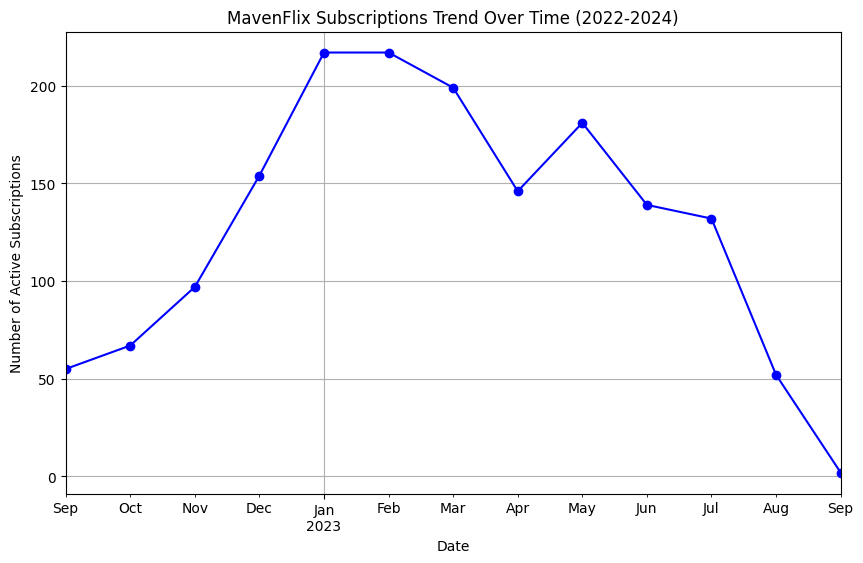

In [ ]:
#How have MavenFlix subscriptions trended over time?

data['created_date'] = pd.to_datetime(data['created_date'])
data['canceled_date'] = pd.to_datetime(data['canceled_date'])

data.set_index('created_date', inplace=True)

data = data.loc['2022-01-01':'2024-12-31']

monthly_subscriptions = data.resample('M').size()

plt.figure(figsize=(10, 6))
monthly_subscriptions.plot(marker='o', color='b')
plt.title('MavenFlix Subscriptions Trend Over Time (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Number of Active Subscriptions')
plt.grid(True)
plt.show()


